In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [2]:
data = pd.read_csv('Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
print('The data shape is:',data.shape)
print('The data size is:',data.size)

The data shape is: (200, 4)
The data size is: 800


1. TV => expenditure done on TV advertisements
2. Radio => expenditure done on radio advertisements
3. Newspaper => expenditure done on newspaper advertisements
4. Sales => The final sales amount collected with the help of expenditures done

Looking at our current dataset, (TV, Radio and Newspaper) are the independent
features and the Sales is the output feature which we have to predict

In [4]:
X = data[['TV', 'Radio', 'Newspaper']] # feature selection
y = data['Sales'] # target selection
print('The type of feature column is:',type(X))
print('The type of target column is:',type(y))

The type of feature column is: <class 'pandas.core.frame.DataFrame'>
The type of target column is: <class 'pandas.core.series.Series'>


In [5]:
print('The shape of feature dataframe is:',X.shape)
print('The shape of target dataseries is:',y.shape)

The shape of feature dataframe is: (200, 3)
The shape of target dataseries is: (200,)


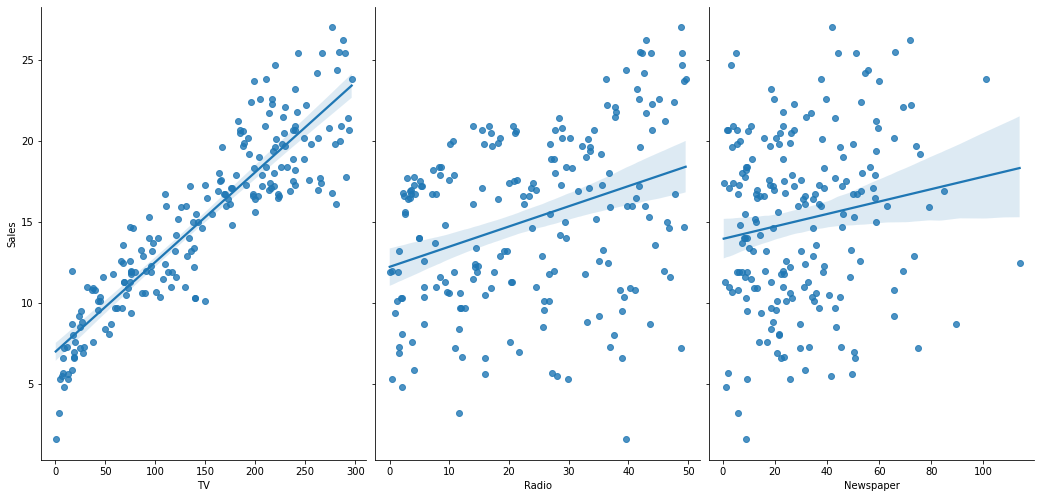

In [6]:
sns.pairplot(data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = ['Sales'], aspect = 0.7, height = 7, kind = 'reg')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2)
print('The shape of training dataset is:',X_train.shape)
print('The shape of testing dataset is:',X_test.shape)
print('The shape of training dataset is:',y_train.shape)
print('The shape of testing dataset is:',y_test.shape)

The shape of training dataset is: (140, 3)
The shape of testing dataset is: (60, 3)
The shape of training dataset is: (140,)
The shape of testing dataset is: (60,)


In [8]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = linreg.predict(X_test)
print(y_pred[0:6])

[15.8584001  10.25455219  8.3433945  18.20597781 18.24404472 17.22677655]


In [10]:
print(y_test[0:6])

112    17.1
29     10.5
182     8.7
199    18.4
193    19.6
85     20.2
Name: Sales, dtype: float64


In [11]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.850049749855937


### Let's remove the Newspaper column from the feature matrix and calculate MSE

In [12]:
X = data[['TV', 'Radio']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.8491575865905112


### The above two mean square error values shows that the Newspaper has no impact on Sales. If we remove Newspaper then also there is no effect on the Sales.